In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from datetime import timedelta, datetime
#import holidays

import matplotlib
import pickle
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.width', 500)

In [2]:
df_train = pd.read_csv('../../../data/df_train_preprocessed.csv')

In [3]:
df_train[(round(df_train['log_TARGET'], 1) <= -29.9)].count()

ID                        599437
TARGET                    599437
open_year                 599437
open_month                599437
first_prediction          574752
log_first_prediction      574752
economic_class            599437
log_TARGET                599437
Retention_count_D0_3      599437
Retention_count_D4_7      599437
Retention_count_D8_11     599437
Retention_count_D12_15    599437
Avg_Lvl_Count_D0_3        599437
Avg_Lvl_Count_D4_7        599437
Avg_Lvl_Count_D8_11       599437
Avg_Lvl_Count_D12_15      599437
Avg_Duration_Lvl0_3       599437
Avg_Duration_Lvl4_7       599437
Avg_Duration_Lvl8_10      599437
Total_AdRevenueD0_3       599437
Total_AdRevenueD4_7       599437
Total_AdRevenueD8_11      599437
Total_AdRevenueD12_15     599437
Total_IAPRevenueD0_3      599437
Total_IAPRevenueD4_7      599437
Total_IAPRevenueD8_11     599437
Total_IAPRevenueD12_15    599437
Total_AdRevenue           599437
Total_IAPRevenue          599437
dtype: int64

In [4]:
df_train['target_class'] = np.where(round(df_train['log_TARGET'], 1) <= -29.9, 1, 0) # class 1 means TARGET is 0.0 

In [5]:
df_nan = df_train[df_train['economic_class'] == 'Nan']

In [6]:
df_train = df_train[df_train['economic_class'] != 'Nan']

In [7]:
X_cols = ['log_first_prediction',
         'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
         'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
         'Avg_Duration_Lvl0_3', 'Avg_Duration_Lvl4_7', 'Avg_Duration_Lvl8_10', 
         'Total_IAPRevenue', 'Total_AdRevenue']

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [9]:
model = RandomForestClassifier(random_state = 128)

In [10]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_train[X_cols]), columns=df_train[X_cols].columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, df_train.target_class, test_size=0.2, random_state=42)

In [12]:
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)

f1_train = f1_score(y_train, train_predictions)
f1_test = f1_score(y_test, test_predictions)

cm = confusion_matrix(y_test, test_predictions)

In [13]:
print(train_acc)
print(test_acc)

print(f1_train)
print(f1_test)

0.9990297338216909
0.7908683723002603
0.9992800967410784
0.8522458041320807


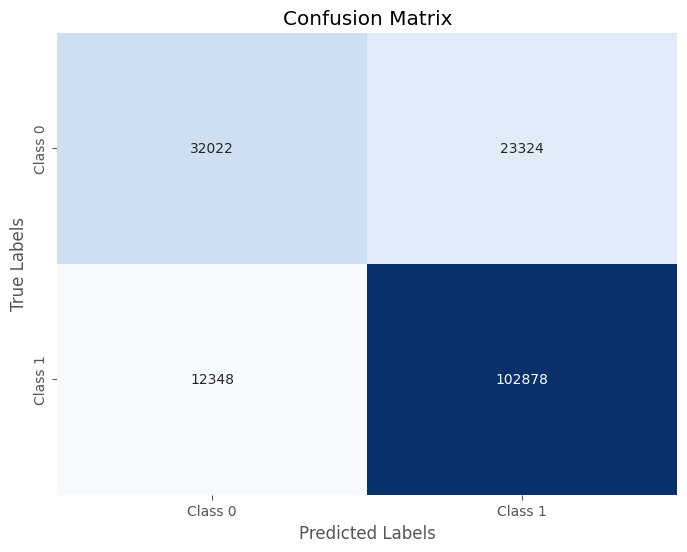

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**reg**

In [15]:
df_train_reg = df_train[df_train['target_class'] == 0]

In [16]:
X_cols = ['log_first_prediction',
          'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
          'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
          'Avg_Duration_Lvl0_3',	'Avg_Duration_Lvl4_7',	'Avg_Duration_Lvl8_10',
          'Total_IAPRevenue', 'Total_AdRevenue']

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [18]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [19]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_train_reg[X_cols]), columns=df_train_reg[X_cols].columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, df_train_reg.log_TARGET, test_size=0.2, random_state=42)

In [21]:
regressor.fit(X_train, y_train)

train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

In [22]:
print(rmse_test)
print(rmse_train)

1.822242685146896
0.687730147913192


**test**

In [24]:
df_test = pd.read_csv('../../../data/df_test_preprocessed.csv')

In [25]:
df_nan = df_test[df_test['economic_class'] == 'Nan']

In [26]:
df_test = df_test[df_test['economic_class'] != 'Nan']

In [27]:
X_clas = ['log_first_prediction',
         'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
         'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
         'Avg_Duration_Lvl0_3', 'Avg_Duration_Lvl4_7', 'Avg_Duration_Lvl8_10', 
         'Total_IAPRevenue', 'Total_AdRevenue']

scaler = MinMaxScaler()
X_cl = pd.DataFrame(scaler.fit_transform(df_test[X_clas]), columns=df_test[X_clas].columns)


test_target_classes = model.predict(X_cl)

df_test.loc[:, 'target_class'] = test_target_classes

df_test_zero = df_test[df_test['target_class'] == 1]

df_test_reg = df_test[df_test['target_class'] == 0]

df_test_zero.loc[:, 'log_TARGET'] = -30.0
df_test_zero.loc[:, 'TARGET'] = 0.0 

/var/folders/w5/m6rwwhxs3f79c4v89rgmvnw40000gn/T/ipykernel_28473/3843865468.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_zero.loc[:, 'log_TARGET'] = -30.0
/var/folders/w5/m6rwwhxs3f79c4v89rgmvnw40000gn/T/ipykernel_28473/3843865468.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_zero.loc[:, 'TARGET'] = 0.0


In [28]:
X_regs = ['log_first_prediction',
          'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
          'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
          'Avg_Duration_Lvl0_3',	'Avg_Duration_Lvl4_7',	'Avg_Duration_Lvl8_10',
          'Total_IAPRevenue', 'Total_AdRevenue']

scaler = MinMaxScaler()
X_re = pd.DataFrame(scaler.fit_transform(df_test_reg[X_regs]), columns=df_test_reg[X_regs].columns)

test_reg_log_TARGET = regressor.predict(X_re)

df_test_reg.loc[:, 'log_TARGET'] = test_reg_log_TARGET

df_test_reg.loc[:, 'TARGET'] = np.power(np.e, df_test_reg['log_TARGET']) - 1.0e-22

/var/folders/w5/m6rwwhxs3f79c4v89rgmvnw40000gn/T/ipykernel_28473/2284775056.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_reg.loc[:, 'log_TARGET'] = test_reg_log_TARGET
/var/folders/w5/m6rwwhxs3f79c4v89rgmvnw40000gn/T/ipykernel_28473/2284775056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_reg.loc[:, 'TARGET'] = np.power(np.e, df_test_reg['log_TARGET']) - 1.0e-22


In [29]:
df_test = pd.concat([df_test_zero, df_test_reg], ignore_index=True)
df_test = df_test.sort_values(by='ID')

In [30]:
df_nan = pd.read_csv('../../../data/test_economic_class/df_nan.csv')

In [31]:
df_sub_global = pd.concat([df_test, df_nan], ignore_index=True)
df_sub_global = df_sub_global.sort_values(by='ID')

In [32]:
df_sub_global['TARGET'] = df_sub_global['TARGET'] + (df_sub_global['Total_AdRevenue'] + df_sub_global['Total_IAPRevenue'])

In [33]:
df_sub_global = df_sub_global[['ID','TARGET']]

In [35]:
df_sub_global.to_csv('../../../data/submissions/df_sub_global.csv', index=False)